<a href="https://colab.research.google.com/github/mbelcuixart-hub/Health-Insurance-Price-Prediction-SQL-ML-/blob/main/Health_Insurance_Price_Prediction_(SQL%2C_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

The health insurance industry is complex and dynamic, with costs that vary significantly depending on various factors characterizing the insured individuals. Understanding these factors and accurately predicting health insurance costs can be highly valuable for insurance companies, clients, and regulatory authorities.

# OBJECTIVE

The objective of this task is to develop a machine learning model capable of predicting health insurance costs for individuals based on their personal characteristics and history. This model could be used to:

Optimize insurance pricing: Insurance companies could use the model to set fairer and more personalized premiums, better reflecting each individual’s risk.

Provide information to clients: Customers could use the model to compare prices from different insurance companies and choose the option that best fits their needs and budget.

Analyze market trends: Regulatory authorities and researchers could use the model to analyze market trends, identify potential systemic risks, and develop more effective public policies.

# TOOLS

Python, Pandas, Matplotlib, Numpy, Seaborn, (Google Colab)

# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# DATASET DESCRIPTION

The dataset contains information on individuals’ personal characteristics and health-related factors, along with the cost of their health insurance. Each row represents a single individual, and each column corresponds to a specific attribute or feature. The target variable is the insurance cost, which the model aims to predict.

Age: The age of the individual.

Sex: Gender of the individual (male/female).

BMI: Body Mass Index, indicating body fat based on height and weight.

Children: Number of children/dependents covered by the insurance.

Smoker: Whether the individual is a smoker (yes/no).

Region: The geographical region where the individual resides.

The dataset is useful for building predictive models to estimate health insurance costs, perform exploratory data analysis, and understand the factors influencing insurance pricing.

# DATA LOADING

In this section, the dataset is loaded from a CSV file.

In [ ]:
df= pd.read_csv("insurance.csv")

# EDA - EXPLORATORY DATA ANALYSIS

In [ ]:
conn = sqlite3.connect(':memory:')
df = pd.read_csv('insurance.csv')
df.to_sql('mi_tabla', conn, index=False, if_exists='replace')


1338

In [ ]:
query = "SELECT * FROM mi_tabla LIMIT 5;"
result = pd.read_sql(query, conn)
print(result)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
pd.read_sql("""
    SELECT smoker, AVG(charges) AS avg_charges
    FROM insurance
    GROUP BY smoker;
""", conn)


,smoker,avg_charges
0,no,8434.268298
1,yes,32050.231832


In [ ]:
pd.read_sql("""
    SELECT region, AVG(charges) AS avg_charges
    FROM insurance
    GROUP BY region;
""", conn)


,region,avg_charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [ ]:
pd.read_sql("""
    SELECT children, AVG(charges) AS avg_charges
    FROM insurance
    GROUP BY children
    ORDER BY children;
""", conn)


,children,avg_charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [ ]:
pd.read_sql("""
    SELECT *
    FROM insurance
    WHERE charges > 40000
    ORDER BY charges DESC
    LIMIT 10;
""", conn)


,age,sex,bmi,children,smoker,region,charges
0,54,female,47.410,0,yes,southeast,63770.42801
1,45,male,30.360,0,yes,southeast,62592.87309
2,52,male,34.485,3,yes,northwest,60021.39897
3,31,female,38.095,1,yes,northeast,58571.07448
4,33,female,35.530,0,yes,northwest,55135.40209
5,60,male,32.800,0,yes,southwest,52590.82939
6,28,male,36.400,1,yes,southwest,51194.55914
7,64,male,36.960,2,yes,southeast,49577.66240
8,59,male,41.140,1,yes,southeast,48970.24760
9,44,female,38.060,0,yes,southeast,48885.13561


In [ ]:
pd.read_sql("""
    SELECT smoker, sex, COUNT(*) AS count
    FROM insurance
    GROUP BY smoker, sex;
""", conn)


,smoker,sex,count
0,no,female,547
1,no,male,517
2,yes,female,115
3,yes,male,159


In [ ]:
conn = sqlite3.connect(':memory:')
df = pd.read_csv('insurance.csv')
df.to_sql('insurance', conn, index=False, if_exists='replace')

query = """
SELECT *
FROM insurance
WHERE charges BETWEEN 20000 AND 40000;
"""

result = pd.read_sql(query, conn)
result.head()


,age,sex,bmi,children,smoker,region,charges
0,33,male,22.705,0,no,northwest,21984.47061
1,60,female,25.840,0,no,northwest,28923.13692
2,62,female,26.290,0,yes,southeast,27808.72510
3,27,male,42.130,0,yes,southeast,39611.75770
4,30,male,35.300,0,yes,southwest,36837.46700


In [ ]:
pd.read_sql("""
SELECT age,
       bmi,
       CASE
           WHEN bmi >= 30 THEN 'obese'
           WHEN bmi >= 25 THEN 'overweight'
           ELSE 'normal'
       END AS bmi_category,
       charges
FROM insurance;
""", conn)


,age,bmi,bmi_category,charges
0,19,27.900,overweight,16884.92400
1,18,33.770,obese,1725.55230
2,28,33.000,obese,4449.46200
3,33,22.705,normal,21984.47061
4,32,28.880,overweight,3866.85520
...,...,...,...,...
1333,50,30.970,obese,10600.54830
1334,18,31.920,obese,2205.98080
1335,18,36.850,obese,1629.83350
1336,21,25.800,overweight,2007.94500


In [ ]:
pd.read_sql("""
SELECT *
FROM insurance
WHERE age > 50 AND charges > 20000
ORDER BY charges DESC;
""", conn)


,age,sex,bmi,children,smoker,region,charges
0,54,female,47.410,0,yes,southeast,63770.42801
1,52,male,34.485,3,yes,northwest,60021.39897
2,60,male,32.800,0,yes,southwest,52590.82939
3,64,male,36.960,2,yes,southeast,49577.66240
4,59,male,41.140,1,yes,southeast,48970.24760
...,...,...,...,...,...,...,...
88,53,male,20.900,0,yes,southeast,21195.81800
89,55,male,33.000,0,no,southeast,20781.48892
90,57,male,40.280,0,no,northeast,20709.02034
91,55,male,37.300,0,no,southwest,20630.28351


Exploration of the data structure

In [ ]:
df.head ()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Interpretation of the data set

### DATA CLEANING

Search for null values

In [ ]:
df.head()
df.dtypes
df.isnull().sum().sum()

np.int64(0)

No missing values were detected in test dataset.

Checking for duplicate rows or duplicate columns

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


# DATA VISUALIZATION

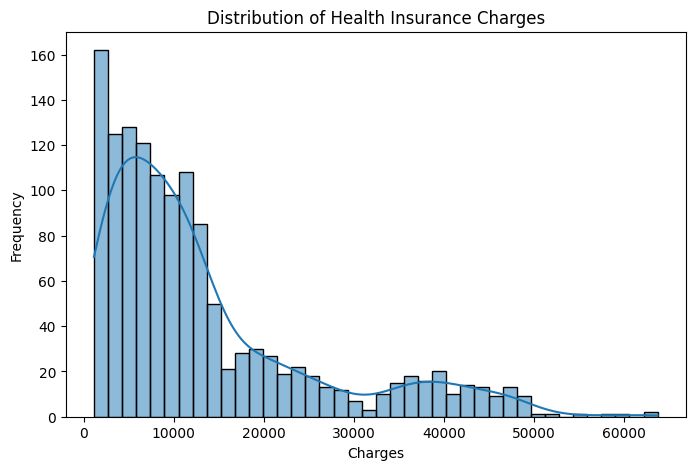

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=40, kde=True)
plt.title('Distribution of Health Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


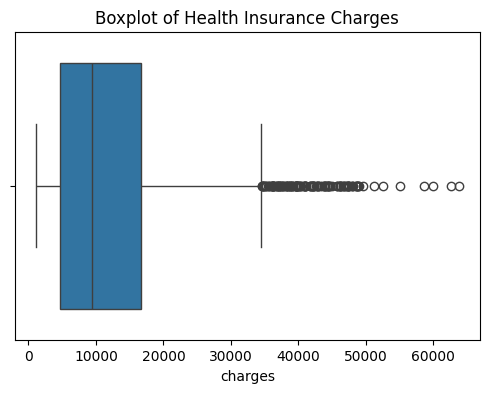

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Health Insurance Charges')
plt.show()


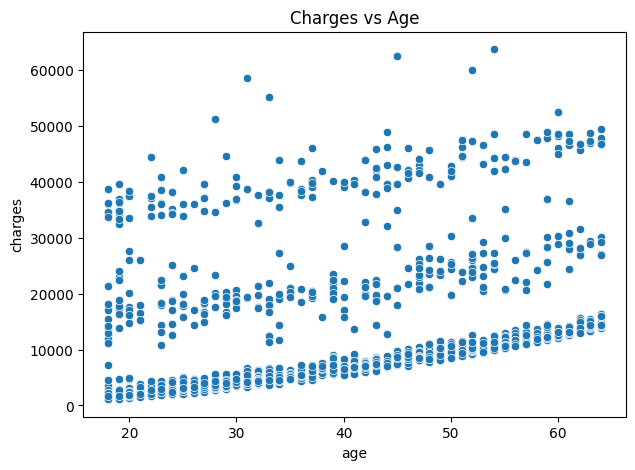

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Charges vs Age')
plt.show()


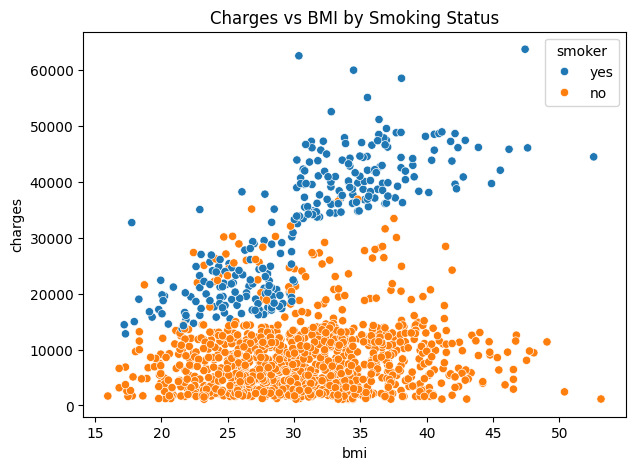

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='bmi',
    y='charges',
    hue='smoker',
    data=df
)
plt.title('Charges vs BMI by Smoking Status')
plt.show()


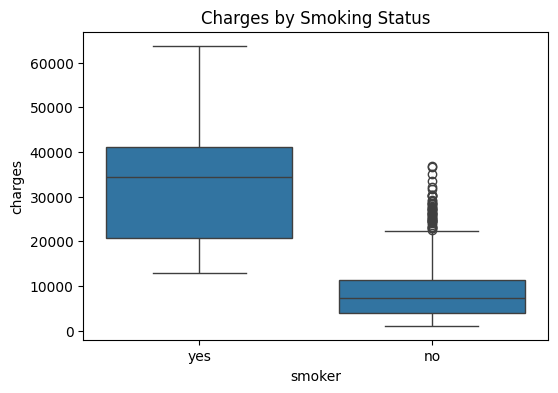

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()


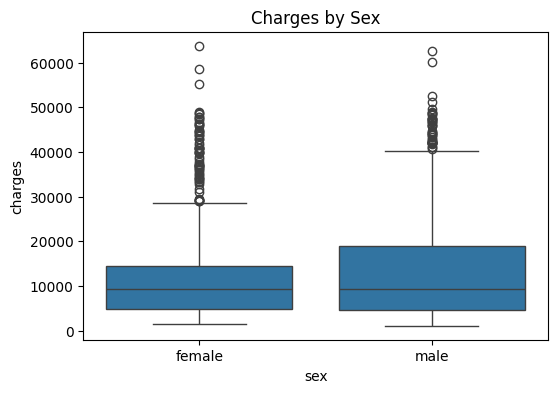

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()


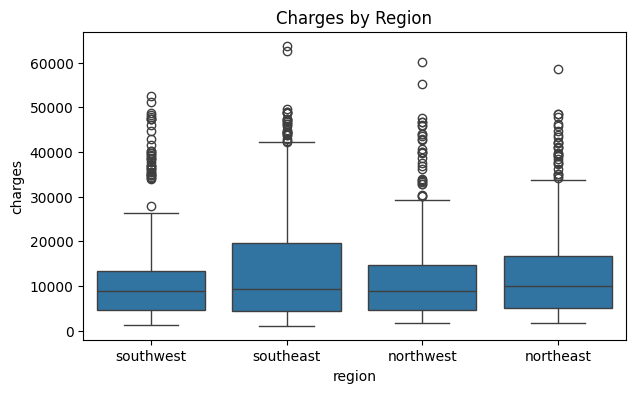

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()


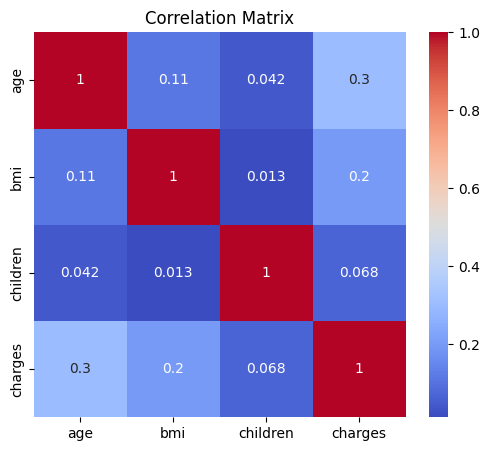

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[['age', 'bmi', 'children', 'charges']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix')
plt.show()


# MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr


(np.float64(5796.284659276273), 0.7835929767120724)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(np.float64(4586.935636079838), 0.8644756815249467)

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'R2': [r2_lr, r2_rf]
})

results


,Model,RMSE,R2
0,Linear Regression,5796.284659,0.783593
1,Random Forest,4586.935636,0.864476


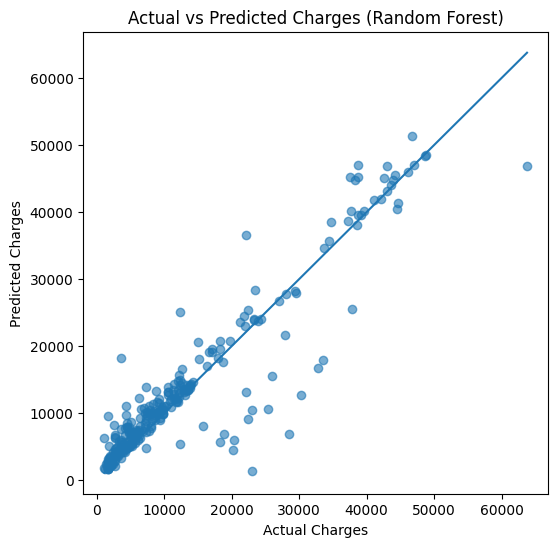

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Random Forest)')
plt.show()


# EVALUATION

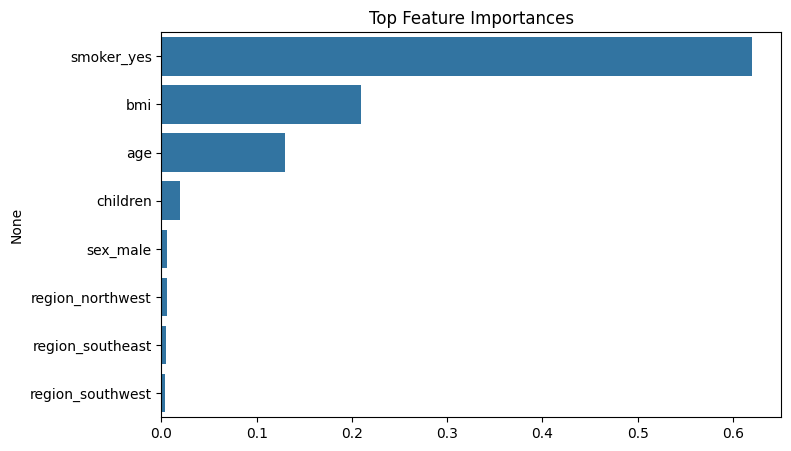

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('charges', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['charges']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title('Top Feature Importances')
plt.show()


# CONCLUSIONS

The Random Forest model predicts health insurance charges more accurately than Linear Regression, achieving an RMSE of approximately 4,587 and an R² of 0.86. The most important factors influencing charges are smoking status, BMI, and age. This model can help insurance companies set more personalized premiums and allow customers to compare different insurance options more effectively. While Linear Regression can still be used as a simple baseline for interpretability, Random Forest is recommended for more accurate predictions and capturing complex patterns in the data.